In [1]:
import numpy as np
from scipy.fftpack import dct
from scipy.fftpack import idct
from PIL import Image

In [2]:
def dct_encode(matrix):
    intermediate = dct(matrix, type=2, norm="ortho", axis=0)
    final = dct(intermediate, type=2, norm="ortho", axis=1)
    return final
    
def dct_decode(matrix):
    intermediate = idct(matrix, type=2, norm="ortho", axis=0)
    final = idct(intermediate, type=2, norm="ortho", axis=1)
    return final

In [3]:
def compress_dct(matrix, new_size):
    return matrix[0:new_size, 0:new_size]

In [4]:
def pad_dct(matrix, new_size):
    temp = np.zeros((new_size, new_size))
    rows, cols = matrix.shape
    temp[0:rows, 0:cols] = matrix
    return temp
    

In [5]:
def decode_image(dct_matrix, image_size):
    raw_image_matrix = dct_decode(pad_dct(dct_matrix, image_size))
    image = Image.fromarray(np.clip(np.rint(raw_image_matrix), 0, 255).astype('uint8'), mode="L")
    return image

def encode_image(image, compressed_size):
    return compress_dct(dct_encode(np.asarray(image)), compressed_size)
    

In [6]:
import struct

def write_compressed_dct_to_byte_string(compressed_image):
    dim = compressed_image.shape[0]
    vals = [struct.pack("f", item) for item in compressed_image.flatten()]
    
    return struct.pack("H", dim) + "".join(vals)
    

def read_compressed_dct_from_byte_string(byte_string):
    size = struct.unpack('h', byte_string[0:2])[0]
    image_vals = []

    byte_vals = byte_string[2:]
    for i in xrange(0, len(byte_vals), 4):
        image_vals.append(struct.unpack('f', byte_vals[i:i+4])[0])
    return np.reshape(np.array(image_vals), newshape=(size,size))



In [7]:
# Helper function that allows us to visualize
# the actual DCT matrix that is produced
def _print_dct_image(image_dct):
    min_dct = np.min(image_dct)
    max_dct = np.max(image_dct)
    rescaled = ((image_dct - min_dct)/(max_dct - min_dct)) * 255
    return Image.fromarray(np.rint(rescaled).astype('uint8')[0:10, 0:10], mode="L")

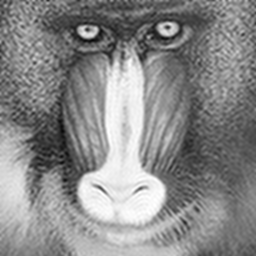

In [8]:
i = Image.open('test_image.bmp').convert("L")

dct_matrix = encode_image(i, 100)
decode_image(dct_matrix, 256)